# Import

import des differentes librairies

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

# Chargement et pretraitement des données

On rend le drive accessible par le code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Définir les chemins des données d'entraînement et de validation dans votre Google Drive

In [3]:
train_data_path = '/content/drive/MyDrive/Train_data/'
val_data_path = '/content/drive/MyDrive/Val_data/'

Définir les transformations pour prétraiter les données

In [4]:

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


Charger les données d'entraînement et de validation auquelles on appliques les transformations predefinies

In [5]:
train_dataset = datasets.ImageFolder(train_data_path, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = datasets.ImageFolder(val_data_path, transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False)

# Definition du modele

Vérifiez si CUDA (la meuilleure machine) est disponible

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Charger le modèle ResNet pré-entraîné (ou définir votre propre) puis le bouger sur cuda

In [7]:
resnet_model = models.resnet50(pretrained=True)
num_classes = len(train_dataset.classes)

resnet_model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

 Définir la fonction de perte et l'optimiseur

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet_model.parameters(), lr=0.001, momentum=0.9)

# Entrainement du modele et affichage des resultats

                  Epoch 1/20,
Loss: 6.0358 / Validation Loss: 3.6526 / Validation Accuracy: 0.2462
                  Epoch 2/20,
Loss: 1.4351 / Validation Loss: 2.6693 / Validation Accuracy: 0.3231
                  Epoch 3/20,
Loss: 0.5163 / Validation Loss: 2.5005 / Validation Accuracy: 0.3385
                  Epoch 4/20,
Loss: 0.2260 / Validation Loss: 2.3347 / Validation Accuracy: 0.4154
                  Epoch 5/20,
Loss: 0.1133 / Validation Loss: 2.4102 / Validation Accuracy: 0.4154
                  Epoch 6/20,
Loss: 0.0729 / Validation Loss: 2.6145 / Validation Accuracy: 0.4000
                  Epoch 7/20,
Loss: 0.0584 / Validation Loss: 2.3622 / Validation Accuracy: 0.4154
                  Epoch 8/20,
Loss: 0.0625 / Validation Loss: 2.2555 / Validation Accuracy: 0.4308
                  Epoch 9/20,
Loss: 0.0474 / Validation Loss: 2.4798 / Validation Accuracy: 0.4000
                  Epoch 10/20,
Loss: 0.0503 / Validation Loss: 2.6166 / Validation Accuracy: 0.3692
         

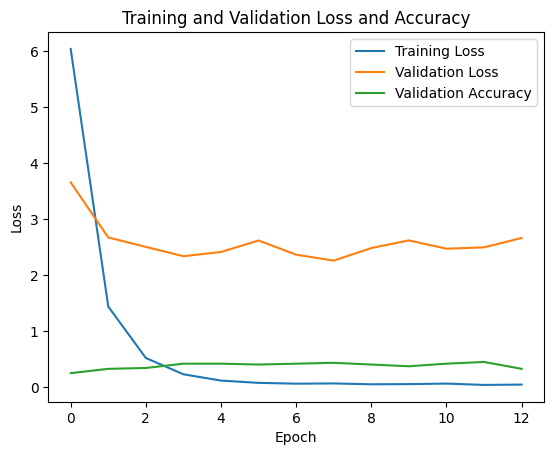

In [9]:

# Variables pour stocker les valeurs de perte
train_losses = []
val_losses = []
val_acc = []

# Paramètres pour l'arrêt anticipé
patience = 5  # Nombre d'époques à attendre avant d'arrêter
best_val_loss = float('inf')
counter = 0  # Compteur pour suivre le nombre d'époques sans amélioration


# Entraînement du modèle
num_epochs = 20
for epoch in range(num_epochs):
    resnet_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    print(f"                  Epoch {epoch+1}/{num_epochs},\nLoss: {epoch_loss:.4f} / ", end="")

    # Évaluation du modèle sur l'ensemble de validation
    resnet_model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Déplacer les données sur CUDA
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = resnet_model(inputs)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item() * inputs.size(0)

    val_epoch_loss = val_running_loss / len(val_dataset)
    val_losses.append(val_epoch_loss)
    print(f"Validation Loss: {val_epoch_loss:.4f} / ", end="")
    correct = 0
    total = 0
    with torch.no_grad():
      for inputs, labels in val_loader:
        # Déplacer les données sur CUDA
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = resnet_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    val_acc.append(accuracy)
    print(f"Validation Accuracy: {accuracy:.4f}")

    # Critère d'arrêt anticipé
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered! Training stopped.")
            break

# Visualisation des courbes de perte
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss and Accuracy')
plt.legend()
plt.show()


torch.save(resnet_model.state_dict(), 'modeleState.pt')